# Random Forest applied to LendingClub data set 

For this exercise, we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club **connects people who need money (borrowers) with people who have money (investors).** We try to create a model to **predict the risk of lending money to someone given a wide range of credit related data**. We will use lending data from 2007-2010 and be trying to classify and predict **whether or not the borrower paid back their loan in full.**

Here are what the columns in the data set represent:

* **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment**: The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico**: The FICO credit score of the borrower.
* **days.with.cr.line**: The number of days the borrower has had a credit line.
* **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* **not.fully.paid**: The quantity of interest for classification - whether the borrower paid back the money in full or not

## Step 1:  Import Libraries and data set

**Import the usual libraries for pandas and plotting**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the Data

** Use pandas to read loan_data.csv**

In [4]:
df = pd.read_csv('Datasets/loan_data.csv')

### Check out the info(), head(), and describe() methods on loans

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.head(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [8]:
df.tail(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9558,0,debt_consolidation,0.1533,696.57,11.805595,17.21,682,2790.041667,38578,86.9,4,0,0,0
9559,0,credit_card,0.1273,688.11,11.314475,21.13,732,5881.000000,35227,54.3,5,0,0,0
9560,0,all_other,0.1867,547.36,11.407565,15.76,667,10050.041670,13255,88.4,7,0,0,0
9561,0,all_other,0.0788,115.74,10.999095,10.17,722,4410.000000,11586,61.6,4,0,0,0
9562,0,debt_consolidation,0.1348,508.87,10.933107,17.76,717,3870.041667,8760,28.2,6,0,0,0
9563,0,debt_consolidation,0.1099,556.50,11.225243,17.84,727,6840.041667,18753,29.0,4,0,0,1
9564,0,all_other,0.1385,511.56,12.323856,12.33,687,6420.041667,385489,51.2,4,0,0,0
9565,0,all_other,0.1459,396.35,10.308953,21.04,697,3390.000000,26117,78.4,6,0,0,1
9566,0,all_other,0.2164,551.08,11.002100,24.06,662,1800.000000,16441,49.8,9,0,0,1
9567,0,all_other,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0


In [9]:
print("Follwoing is the break down of credit approval status. 1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

Follwoing is the break down of credit approval status. 1 means approved credit, 0 means not approved.
1    7710
0    1868
Name: credit.policy, dtype: int64


In [10]:
print(df['not.fully.paid'].value_counts())

0    8045
1    1533
Name: not.fully.paid, dtype: int64


## Step 2: Exploratory Data Analysis

### Histogram of FICO scores by credit approval status

Text(0.5, 0, 'FICO score')

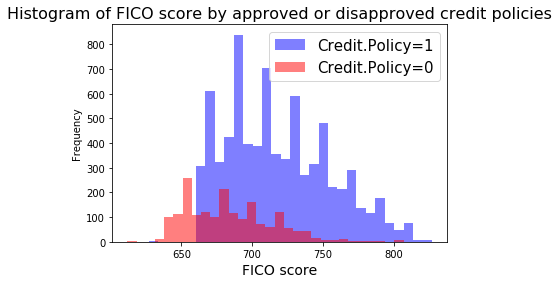

In [11]:
# plot fico score distribution of those who passed credit underwriting
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue', label='Credit.Policy=1')
# plot fico score distribution of those who didn't pass credit underwriting
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5, color='red', label='Credit.Policy=0')

plt.legend(fontsize=15)
plt.title ("Histogram of FICO score by approved or disapproved credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)

<img src="pic5.png">

### Presence or absence of statistical difference of various factors between credit approval status

Text(0, 0.5, 'Interest rate')

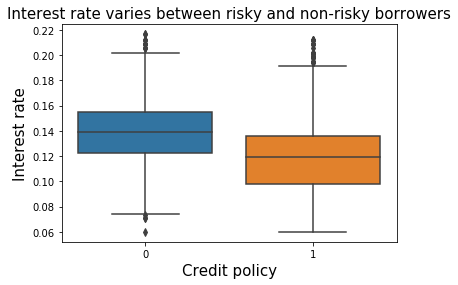

In [12]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Log. annual income')

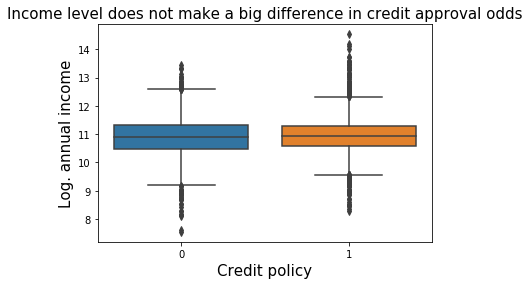

In [13]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log. annual income",fontsize=15)

Text(0, 0.5, 'Days with credit line')

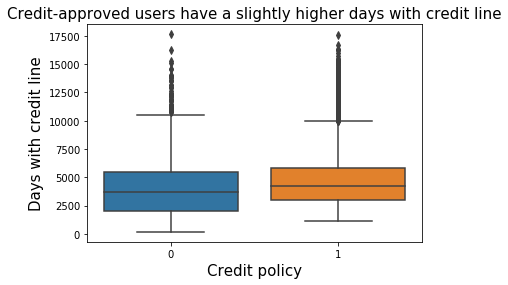

In [14]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

Text(0, 0.5, 'Debt-to-income ratio')

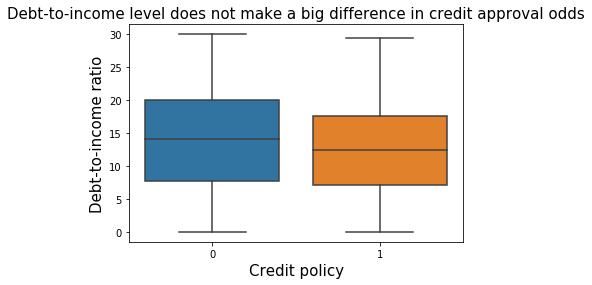

In [15]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

### Countplot of loans by purpose, with the color hue defined by not.fully.paid

Text(0.5, 0, 'Purpose')

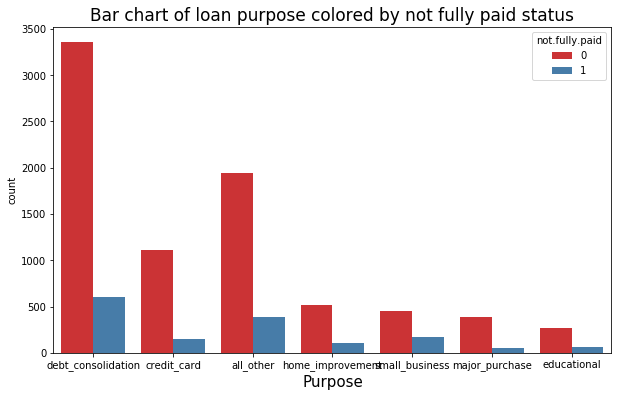

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

### Trend between FICO score and interest rate

C:\Users\Brian.Ho\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


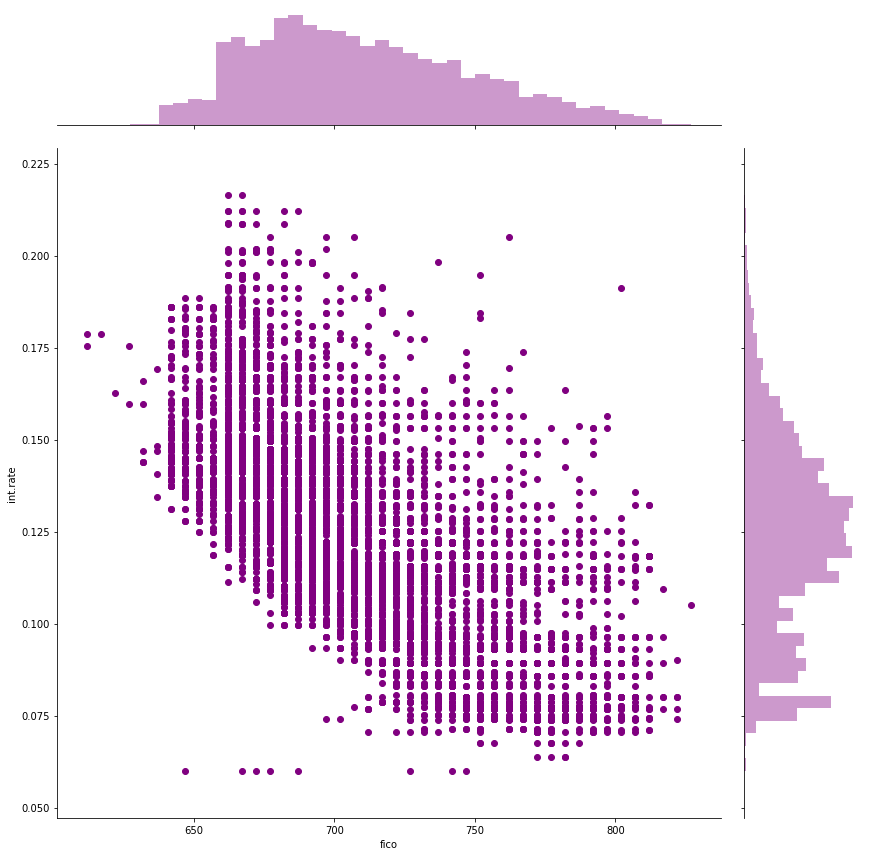

In [17]:
sns.jointplot(x='fico',y='int.rate',data=df, color='purple', size=12)

## Step 3: Setting up the Data
## Categorical Features

The **purpose** column as categorical. We transform them using dummy variables so sklearn will be able to understand them.

In [18]:
df_final = pd.get_dummies(df,['purpose'], drop_first=True)

In [19]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## A. Upsampling


In [34]:
# Due to inbalanced dataset
# Here to reset balance the dataset using resampling

from sklearn.utils import resample

# Separate majority and minority classes
df_final_majority = df_final[df_final['not.fully.paid']==0]
df_final_minority = df_final[df_final['not.fully.paid']==1]

print(df_final_majority.head())
print(df_final_minority.head())
print(df_final_majority.shape)
print(df_final_minority.shape)

# # Upsample minority class
df_minority_upsampled = resample(df_final_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=8045,    # to match majority class
                                 random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
df_final_upsampled = pd.concat([df_final_majority, df_minority_upsampled])
 
# # Display new class counts
df_final_upsampled['not.fully.paid'].value_counts()
# # 1    8045
# # 0    8045
# # Name: balance, dtype: int64

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

1    8045
0    8045
Name: not.fully.paid, dtype: int64

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X = df_final_upsampled.drop('not.fully.paid',axis=1)
y = df_final_upsampled['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [36]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


## Experiment 1: Training a Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [41]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split =10)

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [42]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [43]:
predictions = dtree.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
confusion_matrix(y_test,predictions)

array([[1626,  761],
       [1047, 1393]], dtype=int64)

In [54]:
print(confusion_matrix(y_train,dtree.predict(X_train)))
print(classification_report(y_train,dtree.predict(X_train)))

[[3935 1723]
 [2311 3294]]
              precision    recall  f1-score   support

           0       0.63      0.70      0.66      5658
           1       0.66      0.59      0.62      5605

   micro avg       0.64      0.64      0.64     11263
   macro avg       0.64      0.64      0.64     11263
weighted avg       0.64      0.64      0.64     11263



In [46]:
y_test.value_counts()

1    2440
0    2387
Name: not.fully.paid, dtype: int64

<img src="pic10.png">

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64      2387
           1       0.65      0.57      0.61      2440

   micro avg       0.63      0.63      0.63      4827
   macro avg       0.63      0.63      0.62      4827
weighted avg       0.63      0.63      0.62      4827



<img src="pic3.png">


## Experiment 2: Training a Decision Tree Model using different Parameters Values

In [60]:
dtree1 = DecisionTreeClassifier(criterion='gini',max_depth=15, min_samples_split =2)

In [61]:
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
predictions1 = dtree1.predict(X_test)

In [63]:
confusion_matrix(y_test,predictions1)

array([[1798,  589],
       [ 396, 2044]], dtype=int64)

In [64]:
print(confusion_matrix(y_train,dtree1.predict(X_train)))
print(classification_report(y_train,dtree1.predict(X_train)))

[[4959  699]
 [ 766 4839]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      5658
           1       0.87      0.86      0.87      5605

   micro avg       0.87      0.87      0.87     11263
   macro avg       0.87      0.87      0.87     11263
weighted avg       0.87      0.87      0.87     11263



In [65]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      2387
           1       0.78      0.84      0.81      2440

   micro avg       0.80      0.80      0.80      4827
   macro avg       0.80      0.80      0.80      4827
weighted avg       0.80      0.80      0.80      4827



## Training a Decision Tree Model using Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)

In [68]:
clf.fit(X, y)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [69]:
predictions2 = clf.predict(X_test)

In [70]:
confusion_matrix(y_test,predictions2)

array([[2370,   17],
       [  41, 2399]], dtype=int64)

In [71]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2387
           1       0.99      0.98      0.99      2440

   micro avg       0.99      0.99      0.99      4827
   macro avg       0.99      0.99      0.99      4827
weighted avg       0.99      0.99      0.99      4827



Relative importance of the features:  [0.03610913 0.12865653 0.10726851 0.10285642 0.0969756  0.08472485
 0.10757825 0.09768834 0.10165145 0.06092057 0.01374761 0.00866917
 0.01051934 0.01288465 0.00510984 0.00619532 0.0052427  0.01320172]


<BarContainer object of 18 artists>

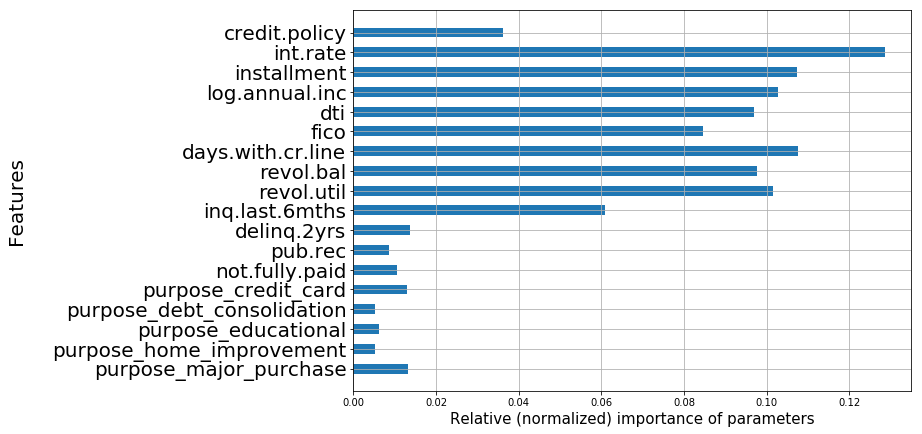

In [75]:
print("Relative importance of the features: ",clf.feature_importances_)

plt.figure(figsize=(10,7))
plt.grid(True)
plt.yticks(range(19,1,-1),df_final_upsampled.columns[:-1],fontsize=20)
plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
plt.ylabel("Features\n",fontsize=20)
plt.barh(range(19,1,-1),width=clf.feature_importances_,height=0.5)